In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("esg.csv")

In [2]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn

In [4]:
df.head()

,Name,Year,Annual_Profit,E,S,G,ESG
0,1,2019,7659,14,3,8,3
1,1,2020,6321,5,17,26,12
2,1,2021,8745,9,29,28,18
3,2,2019,7841,6,5,2,1
4,2,2020,5639,4,11,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Name           48 non-null     int64
 1   Year           48 non-null     int64
 2   Annual_Profit  48 non-null     int64
 3   E              48 non-null     int64
 4   S              48 non-null     int64
 5   G              48 non-null     int64
 6   ESG            48 non-null     int64
dtypes: int64(7)
memory usage: 2.8 KB


In [6]:
 df['Name'].value_counts()

1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
Name: Name, dtype: int64

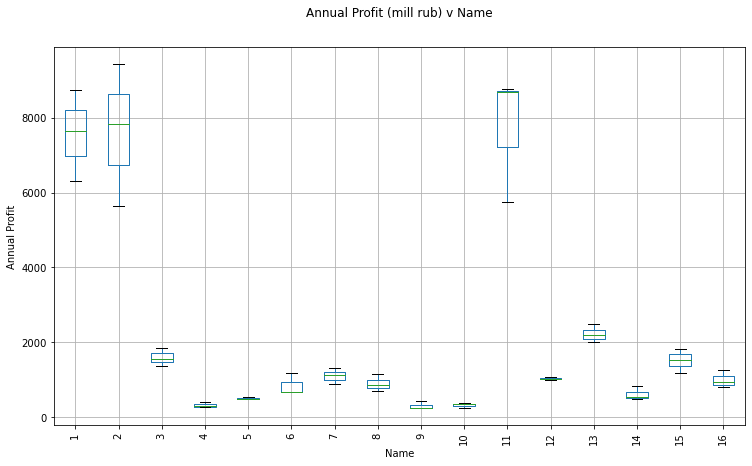

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Annual_Profit', 'Name', ax=ax)
plt.suptitle('Annual Profit (mill rub) v Name')
plt.title('')
plt.ylabel('Annual Profit')
plt.xticks(rotation=90)
plt.show()

In [8]:
df = df[["ESG", "E", "S", "G", "Annual_Profit"]]
X = df.drop("ESG", axis=1)
y = df["ESG"]
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [9]:
y_pred = linear_reg.predict(X)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [11]:
error

4.020952113925245

In [12]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [13]:
y_pred = dec_tree_reg.predict(X)

In [14]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.0f}".format(error))

0


In [15]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [16]:
y_pred = random_forest_reg.predict(X)

In [17]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.0f}".format(error))

3


In [18]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [19]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.0f}".format(error))

0


In [20]:
X

,E,S,G,Annual_Profit
0,14,3,8,7659
1,5,17,26,6321
2,9,29,28,8745
3,6,5,2,7841
4,4,11,2,5639
5,10,25,3,9431
6,0,0,0,1369
7,35,38,37,1554
8,55,79,81,1856
9,26,28,6,287


In [21]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm

In [22]:
import statsmodels.formula.api as smf

model = smf.ols(formula='ESG ~ Annual_Profit + E + S + G', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESG   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     338.1
Date:                Fri, 13 May 2022   Prob (F-statistic):           7.05e-32
Time:                        07:56:18   Log-Likelihood:                -134.90
No. Observations:                  48   AIC:                             279.8
Df Residuals:                      43   BIC:                             289.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5581      1.076      0.519

In [23]:
import pickle
data = {"model": regressor}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [24]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]

In [25]:
y_pred = regressor_loaded.predict(X)
y_pred

array([  2.5 ,  12.  ,  19.75,   1.5 ,   1.5 ,   9.  ,   0.  ,  38.  ,
        68.  ,  26.  ,  47.  , 118.  ,   0.  ,   4.6 ,   8.  ,   6.  ,
         4.6 ,  11.  ,   4.6 ,  42.  ,  32.  ,  10.  ,  15.  ,  26.  ,
         0.  ,  22.  ,  28.  ,   0.  ,  14.  ,   6.  ,   9.  ,   4.6 ,
        15.  ,   4.6 ,  19.75,  50.  ,   0.  ,  33.  ,  44.  ,  14.  ,
        13.  ,  19.75,  19.75,  39.  ,  77.  ,   2.5 ,  37.  ,  37.  ])